In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn import grid_search
from sklearn import metrics
from sklearn import cross_validation
from sklearn.externals import joblib

import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

import operator
import itertools
import random

C:\Dev\Anaconda43-Python36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Dev\Anaconda43-Python36\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [324]:
sns.set_context("paper")
sns.set(font_scale=1.5)
thesis_figsize = (12, 9)

In [2]:
FEATURES_DIRECTORY = "Q:\\p_eaglesense\\eaglesense\\data\\topviewkinect\\all"

In [3]:
FEATURES_TAG = "test"

In [4]:
features_csv = "{root}/{tag}_features.csv".format(root=FEATURES_DIRECTORY, tag=FEATURES_TAG)
features_df = pd.read_csv(features_csv)

In [5]:
labels_csv = "{root}/{tag}_labels.csv".format(root=FEATURES_DIRECTORY, tag=FEATURES_TAG)
labels_df = pd.read_csv(labels_csv)

In [18]:
ACTIVITIES = ["Standing", "Sitting", "Pointing", "Phone", "Tablet", "Paper"]

In [19]:
NUM_ACTIVITIES = len(ACTIVITIES)

In [20]:
features_vector = features_df.drop(["subject"], axis=1)

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

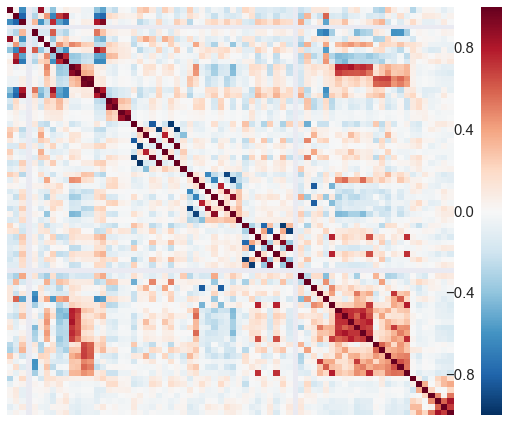

In [333]:
features_corr = features_vector.corr()
fig, ax = plt.subplots(figsize=(10,7.5))
x = sns.heatmap(features_corr, ax=ax, xticklabels=False, yticklabels=False)
sns.despine()
plt.yticks(rotation=0)

In [21]:
num_features = features_vector.shape[1]

In [22]:
output_vector = labels_df[["activity"]]

In [23]:
X = features_vector.values

In [24]:
y = output_vector.values

In [25]:
unique_subjects = features_df["subject"].unique()

In [26]:
X.shape

(77024, 72)

In [27]:
y.shape

(77024, 1)

# CROSS SUBJECT TEST 1 (50/50 Subjects)

In [339]:
features_df.shape

(77024, 73)

In [340]:
features_df.head()

layer_area_0  layer_area_1  layer_area_2  layer_contours_0  \
0      0.297578      0.411765      0.290657               3.0   
1      0.310345      0.419238      0.270417               3.0   
2      0.333959      0.386492      0.279550               3.0   
3      0.348399      0.384181      0.267420               3.0   
4      0.356383      0.370567      0.273050               3.0   

   layer_contours_1  layer_distance_0  layer_distance_1  layer_distance_2  \
0               3.0           16.5529           26.6833           26.0192   
1               3.0           16.4012           26.4764           26.0192   
2               3.0           16.4012           26.2488           26.1725   
3               3.0           16.4012           26.4197           26.4764   
4               3.0           17.7200           27.4591           27.4591   

   layer_distance_3  layer_distance_4   ...     interlayer_pos_16  \
0           26.6833             201.0   ...                 -26.0   
1           26.4764             191.5   ...                 -26.0   
2           26.2488             170.5   ...                 -25.0   
3           26.4197             164.0   ...                 -25.0   
4           27.4591             164.5   ...                 -26.0   

   interlayer_pos_17  extremities0  extreme_infrared_0  extreme_infrared_1  \
0             -107.0           4.0        0.000000e+00                10.0   
1             -105.0           5.0        5.000000e-01                 9.0   
2             -103.0           5.0       2.075076e-322                12.5   
3             -103.0           5.0        0.000000e+00                 6.0   
4             -107.0           3.0        0.000000e+00                 0.0   

   extreme_infrared_2  extreme_infrared_3  extreme_infrared_4  \
0                11.5                11.5                 0.0   
1                11.0                 1.0                 0.5   
2                 4.5                 4.5                 0.5   
3                 4.5                 0.0                 0.0   
4                 0.5                 0.0                 0.0   

   extreme_infrared_5  subject  
0                11.5   2001.0  
1                11.0   2001.0  
2                13.0   2001.0  
3                 7.0   2001.0  
4                 0.5   2001.0  

[5 rows x 73 columns]

In [341]:
crosssubject_1_X_train = np.array([], dtype=np.float64).reshape(0, num_features)
crosssubject_1_y_train = np.array([], dtype=np.int32).reshape(0, 1)

crosssubject_1_X_test = np.array([], dtype=np.float64).reshape(0, num_features)
crosssubject_1_y_test = np.array([], dtype=np.int32).reshape(0, 1)

for subject_id in unique_subjects:
    
    subject_features = features_df[features_df["subject"] == subject_id]
    subject_features = subject_features.drop(["subject"], axis=1)
    subject_labels = labels_df[labels_df["subject"] == subject_id]
    subject_labels = subject_labels[["activity"]]

    subject_X = subject_features.values
    subject_y = subject_labels.values
    
    if subject_id % 2 == 1:
        print(subject_id, "\tTrain")
        crosssubject_1_X_train = np.vstack([crosssubject_1_X_train, subject_X])
        crosssubject_1_y_train = np.vstack([crosssubject_1_y_train, subject_y])
    else:
        print(subject_id, "\tTest")
        crosssubject_1_X_test = np.vstack([crosssubject_1_X_test, subject_X])
        crosssubject_1_y_test = np.vstack([crosssubject_1_y_test, subject_y])

2001.0 	Train
2002.0 	Test
2003.0 	Train
2004.0 	Test
2005.0 	Train
2006.0 	Test
2007.0 	Train
2008.0 	Test
2009.0 	Train
2010.0 	Test
2011.0 	Train
2012.0 	Test


In [342]:
crosssubject_1_X_train.shape

(34945, 72)

In [343]:
crosssubject_1_X_test.shape

(42079, 72)

In [344]:
crosssubject_1_train_xgbmatrix = xgb.DMatrix(crosssubject_1_X_train, crosssubject_1_y_train)
crosssubject_1_test_xgbmatrix = xgb.DMatrix(crosssubject_1_X_test, crosssubject_1_y_test)
crosssubject_1_watchlist = [(crosssubject_1_train_xgbmatrix, "train"), (crosssubject_1_test_xgbmatrix, "eval")]

In [359]:
XGB_PARAM_FINAL = {}
XGB_PARAM_FINAL["eta"] = 0.3
XGB_PARAM_FINAL["gamma"] = 1
XGB_PARAM_FINAL["lambda"] = 1
XGB_PARAM_FINAL["alpha"] = 0
XGB_PARAM_FINAL["max_depth"] = 6
XGB_PARAM_FINAL["colsample_bytree"] = 0.5
XGB_PARAM_FINAL["colsample_bylevel"] = 0.5
XGB_PARAM_FINAL["subsample"] = 0.5
XGB_PARAM_FINAL["objective"] = "multi:softmax"
XGB_PARAM_FINAL["eval_metric"] = "merror"
XGB_PARAM_FINAL["num_class"] = len(ACTIVITIES)
XGB_PARAM_FINAL["silent"] = 0
XGB_NUM_ROUNDS = 200
XGB_EARLYSTOPPING_ROUNDS = 30

In [360]:
crosssubject_1_results = {}
cs_validation = xgb.train(params=XGB_PARAM_FINAL, dtrain=crosssubject_1_train_xgbmatrix, num_boost_round=XGB_NUM_ROUNDS,
                          evals=crosssubject_1_watchlist, evals_result=crosssubject_1_results,
                          early_stopping_rounds=XGB_EARLYSTOPPING_ROUNDS)

[0]	train-merror:0.053112	eval-merror:0.282588
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 30 rounds.
[1]	train-merror:0.032909	eval-merror:0.212125
[2]	train-merror:0.02627	eval-merror:0.198294
[3]	train-merror:0.02212	eval-merror:0.174933
[4]	train-merror:0.020432	eval-merror:0.181896
[5]	train-merror:0.018744	eval-merror:0.171606
[6]	train-merror:0.017599	eval-merror:0.170726
[7]	train-merror:0.016254	eval-merror:0.173151
[8]	train-merror:0.014966	eval-merror:0.170726
[9]	train-merror:0.014108	eval-merror:0.163003
[10]	train-merror:0.012935	eval-merror:0.157157
[11]	train-merror:0.012191	eval-merror:0.153117
[12]	train-merror:0.011532	eval-merror:0.148007
[13]	train-merror:0.01076	eval-merror:0.140474
[14]	train-merror:0.010159	eval-merror:0.140735
[15]	train-merror:0.009443	eval-merror:0.134865
[16]	train-merror:0.008699	eval-merror:0.130445
[17]	train-merror:0.008356	eval-merror:0.129946
[1

# CROSS-SUBJECT 1 CLASSIFIER

In [361]:
crosssubject_1_booster = xgb.train(params=XGB_PARAM_FINAL, dtrain=crosssubject_1_train_xgbmatrix, 
                                   num_boost_round=cs_validation.best_iteration+1)

In [362]:
crosssubject_1_y_predicted = crosssubject_1_booster.predict(crosssubject_1_test_xgbmatrix)

In [363]:
crosssubject_1_accuracy = metrics.accuracy_score(crosssubject_1_y_test, crosssubject_1_y_predicted)
crosssubject_1_accuracy

0.90546353287863302

In [364]:
crosssubject_1_cm = metrics.confusion_matrix(crosssubject_1_y_test, crosssubject_1_y_predicted)
crosssubject_1_cm_normalized = crosssubject_1_cm.astype("float") / crosssubject_1_cm.sum(axis=1)[:, np.newaxis]
crosssubject_1_cm_normalized *= 100

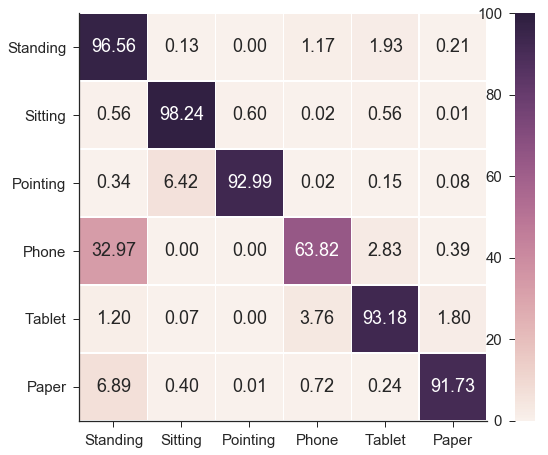

In [365]:
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(10, 7.5))
    sns.heatmap(data=crosssubject_1_cm_normalized, annot=True, fmt=".2f", linewidths=0.5, square=True,
                vmin=0, vmax=100, ax=ax, xticklabels=ACTIVITIES, yticklabels=ACTIVITIES)
    plt.yticks(rotation=0)
    sns.despine()

In [216]:
np.set_printoptions(formatter={'float': lambda x: "{:.2f}".format(x)})

for subject_id in unique_subjects:
    subject_features = features_df[features_df["subject"] == subject_id]
    subject_features = subject_features.drop(["subject"], axis=1)
    subject_labels = labels_df[labels_df["subject"] == subject_id]
    subject_labels = subject_labels[["activity"]]
    subject_X = subject_features.values
    subject_y = subject_labels.values

    subject_xgbmatrix = xgb.DMatrix(subject_X, subject_y)
    subject_y_predicted = crosssubject_1_booster.predict(subject_xgbmatrix)
    
    subject_accuracy = metrics.accuracy_score(subject_y, subject_y_predicted)
    subject_confusion_matrix = metrics.confusion_matrix(subject_y, subject_y_predicted)
    subject_confusion_matrix = subject_confusion_matrix.astype("float") / subject_confusion_matrix.sum(axis=1)[:, np.newaxis]
    subject_confusion_matrix *= 100
    
    print(subject_id, subject_accuracy)
    print(subject_confusion_matrix)

2001.0 0.998031848273
[[100.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 99.93 0.07 0.00 0.00 0.00]
 [0.00 1.06 98.94 0.00 0.00 0.00]
 [0.49 0.00 0.00 99.51 0.00 0.00]
 [0.00 0.00 0.00 0.00 100.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 100.00]]
2002.0 0.906400384986
[[96.19 0.61 0.00 0.76 1.98 0.46]
 [0.71 99.22 0.06 0.00 0.00 0.00]
 [2.84 10.28 84.75 0.00 1.77 0.35]
 [11.37 0.00 0.00 58.60 25.95 4.08]
 [1.41 0.12 0.00 0.00 84.29 14.19]
 [4.78 1.66 0.00 0.00 0.42 93.14]]
2003.0 0.99919175591
[[99.87 0.00 0.00 0.00 0.13 0.00]
 [0.00 100.00 0.00 0.00 0.00 0.00]
 [0.00 0.45 99.55 0.00 0.00 0.00]
 [0.00 0.00 0.00 100.00 0.00 0.00]
 [0.13 0.00 0.00 0.00 99.74 0.13]
 [0.00 0.00 0.00 0.00 0.00 100.00]]
2004.0 0.971540726202
[[92.64 0.12 0.00 4.83 2.42 0.00]
 [0.08 97.86 0.08 0.00 1.98 0.00]
 [0.00 3.57 96.26 0.00 0.17 0.00]
 [0.13 0.00 0.00 99.22 0.65 0.00]
 [1.15 0.00 0.00 0.35 98.50 0.00]
 [1.76 0.00 0.00 0.00 0.00 98.24]]
2005.0 0.999640740075
[[99.90 0.00 0.00 0.10 0.00 0.00]
 [0.00 100.00 0.00 0.00 0.0

In [217]:
feature_importance = crosssubject_1_booster.get_fscore()

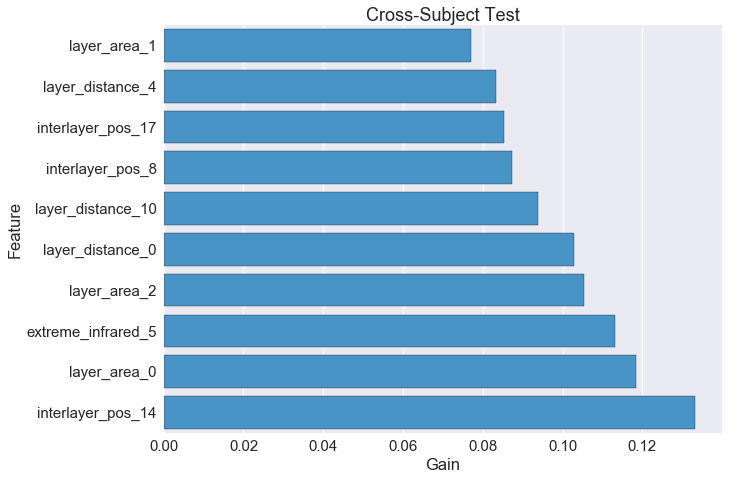

In [218]:
# Create feature importance dataframe
features_importance_formatted = dict()
for feature_idx, feature_name in enumerate(features_vector.columns):
    old_key = "f{}".format(feature_idx)
    if old_key not in feature_importance:
        continue
    new_key = feature_name
    features_importance_formatted[new_key] = feature_importance[old_key]

features_importance_formatted = sorted(features_importance_formatted.items(), key=operator.itemgetter(1))
features_importance_top10 = features_importance_formatted[-10:]
features_importance_df = pd.DataFrame(features_importance_top10, columns=["feature", "gain"])
features_importance_df["gain"] = features_importance_df["gain"] / features_importance_df["gain"].sum()

# Plot
fig, ax = plt.subplots(figsize=(10,7.5))
sns.barplot(x="gain", y="feature", data=features_importance_df, label="Total", color="#3498db", ax=ax)
sns.despine()
ax.set_xlabel("Gain")
ax.set_ylabel("Feature")
ax.set_title("Cross-Subject Test")

In [277]:
features_importance_formatted

[('layer_distance_8', 3),
 ('layer_distance_13', 5),
 ('layer_distance_7', 6),
 ('extremities0', 7),
 ('layer_distance_14', 8),
 ('intralayer_pos_23', 19),
 ('intralayer_pos_0', 19),
 ('layer_distance_5', 19),
 ('layer_distance_6', 24),
 ('intralayer_pos_5', 29),
 ('intralayer_pos_3', 30),
 ('layer_distance_11', 30),
 ('intralayer_pos_20', 32),
 ('intralayer_pos_8', 33),
 ('layer_distance_12', 34),
 ('extreme_infrared_1', 43),
 ('intralayer_pos_19', 44),
 ('intralayer_pos_22', 46),
 ('intralayer_pos_17', 48),
 ('intralayer_pos_21', 48),
 ('intralayer_pos_6', 50),
 ('extreme_infrared_2', 50),
 ('intralayer_pos_2', 51),
 ('intralayer_pos_12', 51),
 ('intralayer_pos_9', 53),
 ('intralayer_pos_25', 54),
 ('intralayer_pos_24', 55),
 ('intralayer_pos_1', 55),
 ('extreme_infrared_0', 56),
 ('interlayer_pos_9', 56),
 ('interlayer_pos_15', 57),
 ('intralayer_pos_18', 58),
 ('interlayer_pos_0', 59),
 ('interlayer_pos_6', 61),
 ('interlayer_pos_12', 63),
 ('intralayer_pos_15', 64),
 ('interlayer_

# DEMOS

In [4]:
p1_features_csv = "{root}/{tag}_features.csv".format(root=FEATURES_DIRECTORY, tag="p1")
p1_features_df = pd.read_csv(p1_features_csv)
p1_labels_csv = "{root}/{tag}_labels.csv".format(root=FEATURES_DIRECTORY, tag="p1")
p1_labels_df = pd.read_csv(p1_labels_csv)

In [5]:
all_features_csv = "{root}/{tag}_features.csv".format(root=FEATURES_DIRECTORY, tag="all")
all_features_df = pd.read_csv(all_features_csv)
all_labels_csv = "{root}/{tag}_labels.csv".format(root=FEATURES_DIRECTORY, tag="all")
all_labels_df = pd.read_csv(all_labels_csv)

In [6]:
eval_features_csv = "{root}/{tag}_features.csv".format(root=FEATURES_DIRECTORY, tag="eval")
eval_features_df = pd.read_csv(eval_features_csv)
eval_labels_csv = "{root}/{tag}_labels.csv".format(root=FEATURES_DIRECTORY, tag="eval")
eval_labels_df = pd.read_csv(eval_labels_csv)

In [7]:
# standing and tablet only

p1_features = p1_features_df.drop(["subject"], axis=1)
p1_labels = p1_labels_df[["activity"]]
p1_standingtablet_series = p1_labels["activity"].isin([0, 4])
p1_standingtablet_features = p1_features.loc[p1_standingtablet_series]
p1_standingtablet_labels = p1_labels.loc[p1_standingtablet_series]
p1_X = p1_standingtablet_features.values
p1_y = p1_standingtablet_labels.values

all_features = all_features_df.drop(["subject"], axis=1)
all_labels = all_labels_df[["activity"]]
all_standingtablet_series = all_labels["activity"].isin([0, 4])
all_standingtablet_features = all_features.loc[all_standingtablet_series]
all_standingtablet_labels = all_labels.loc[all_standingtablet_series]
all_X = all_standingtablet_features.values
all_y = all_standingtablet_labels.values

eval_features = eval_features_df.drop(["subject"], axis=1)
eval_labels = eval_labels_df[["activity"]]
eval_standingtablet_series = eval_labels["activity"].isin([0, 4])
eval_standingtablet_features = eval_features.loc[eval_standingtablet_series]
eval_standingtablet_labels = eval_labels.loc[eval_standingtablet_series]
eval_X = eval_standingtablet_features.values
eval_y = eval_standingtablet_labels.values

In [8]:
p1_standingtablet_features.shape

(1930, 77)

In [9]:
p1_standingtablet_labels.shape

(1930, 1)

In [10]:
all_standingtablet_features.shape

(27996, 77)

In [11]:
all_standingtablet_labels.shape

(27996, 1)

In [12]:
eval_standingtablet_features.shape

(26066, 77)

In [14]:
eval_standingtablet_labels.shape

(26066, 1)

In [28]:
XGB_PARAM_FINAL = {}
XGB_PARAM_FINAL["eta"] = 0.3
XGB_PARAM_FINAL["gamma"] = 1
XGB_PARAM_FINAL["lambda"] = 2
XGB_PARAM_FINAL["alpha"] = 1
XGB_PARAM_FINAL["max_depth"] = 7
XGB_PARAM_FINAL["colsample_bytree"] = 0.5
XGB_PARAM_FINAL["colsample_bylevel"] = 0.5
XGB_PARAM_FINAL["subsample"] = 0.5
XGB_PARAM_FINAL["objective"] = "multi:softmax"
XGB_PARAM_FINAL["eval_metric"] = "merror"
XGB_PARAM_FINAL["num_class"] = len(ACTIVITIES)
XGB_PARAM_FINAL["silent"] = 0

XGB_NUM_ROUNDS = 200
XGB_EARLYSTOPPING_ROUNDS = 30

In [29]:
y = y.astype(np.int)
test_xgbmatrix = xgb.DMatrix(X, y)

In [18]:
standingtablet_train_xgbmatrix = xgb.DMatrix(all_X, all_y)
standingtablet_test_xgbmatrix = xgb.DMatrix(p1_X, p1_y)
standingtablet_watchlist = [(standingtablet_train_xgbmatrix, "train"), (standingtablet_test_xgbmatrix, "eval")]

In [19]:
standingtablet_results = {}
standingtablet_validation = xgb.train(params=XGB_PARAM_FINAL, dtrain=standingtablet_train_xgbmatrix, num_boost_round=XGB_NUM_ROUNDS,
                          evals=standingtablet_watchlist, evals_result=standingtablet_results,
                          early_stopping_rounds=XGB_EARLYSTOPPING_ROUNDS)

[0]	train-merror:0.030397	eval-merror:0.118653
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 30 rounds.
[1]	train-merror:0.025182	eval-merror:0.106736
[2]	train-merror:0.024289	eval-merror:0.103627
[3]	train-merror:0.02186	eval-merror:0.094301
[4]	train-merror:0.020324	eval-merror:0.089637
[5]	train-merror:0.019146	eval-merror:0.084456
[6]	train-merror:0.017931	eval-merror:0.080829
[7]	train-merror:0.016931	eval-merror:0.076684
[8]	train-merror:0.015931	eval-merror:0.073057
[9]	train-merror:0.015038	eval-merror:0.070466
[10]	train-merror:0.014645	eval-merror:0.065803
[11]	train-merror:0.014002	eval-merror:0.064249
[12]	train-merror:0.012966	eval-merror:0.060622
[13]	train-merror:0.011645	eval-merror:0.054922
[14]	train-merror:0.010752	eval-merror:0.050259
[15]	train-merror:0.010144	eval-merror:0.047668
[16]	train-merror:0.009144	eval-merror:0.043523
[17]	train-merror:0.008787	eval-merror:0.041969


In [30]:
test_booster = xgb.train(params=XGB_PARAM_FINAL, dtrain=test_xgbmatrix, num_boost_round=28)

In [31]:
test_booster.save_model("test.model")

In [11]:
test_booster = xgb.Booster(model_file="test.model")

In [12]:
X = np.array([[
    0.297578,0.411765,0.290657,3,3,16.5529,26.6833,26.0192,26.6833,201,0,0,0,0,26.0192,133.5,0,0,0,0,-7,3,10,8,-4,1,15,-7,-9,-12,-5,7,12,3,4,24,8,-3,-12,-1,0,14,0,0,26,1,0,-3,7,18,5,-7,-25,-25,-12,-64,-17,-26,-107,-25,-12,-64,-17,-26,-107,4,0,10,11.5,11.5,0,11.5
]])

In [13]:
X.shape

(1, 72)

In [14]:
X_dmatrix = xgb.DMatrix(X)

In [20]:
X_dmatrix.get_label()

array([], dtype=float32)

In [15]:
test_booster.predict(X_dmatrix).astype(np.int)

array([0])

In [ ]:
y_predicted = test_booster.predict(X_dmatrix).astype(np.int)
accuracy = metrics.accuracy_score(y, y_predicted)
accuracy